<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-19 10:44:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  44.5MB/s    in 3.5s    

2025-04-19 10:44:52 (43.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



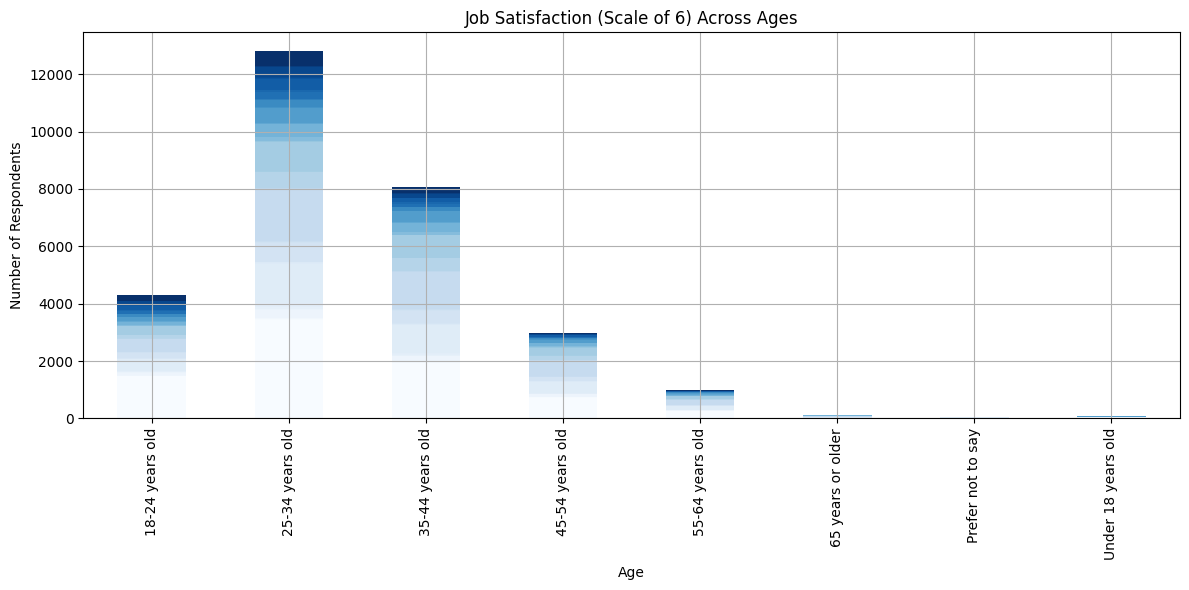

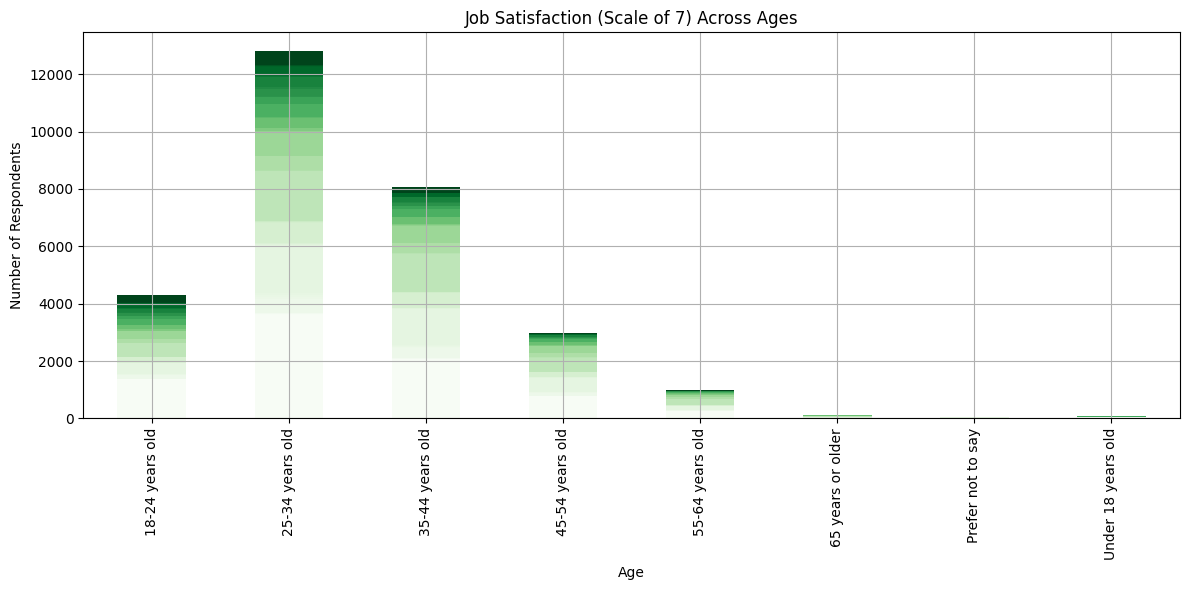

In [23]:
# Load and clean data
df = pd.read_csv("survey-data.csv")
df = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Plot JobSatPoints_6
sat6 = df.groupby(['Age', 'JobSatPoints_6']).size().unstack(fill_value=0)
ax = sat6.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12,6), legend=False)
plt.title('Job Satisfaction (Scale of 6) Across Ages')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot JobSatPoints_7
sat7 = df.groupby(['Age', 'JobSatPoints_7']).size().unstack(fill_value=0)
ax = sat7.plot(kind='bar', stacked=True, colormap='Greens', figsize=(12,6), legend=False)
plt.title('Job Satisfaction (Scale of 7) Across Ages')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_5395/161515476.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


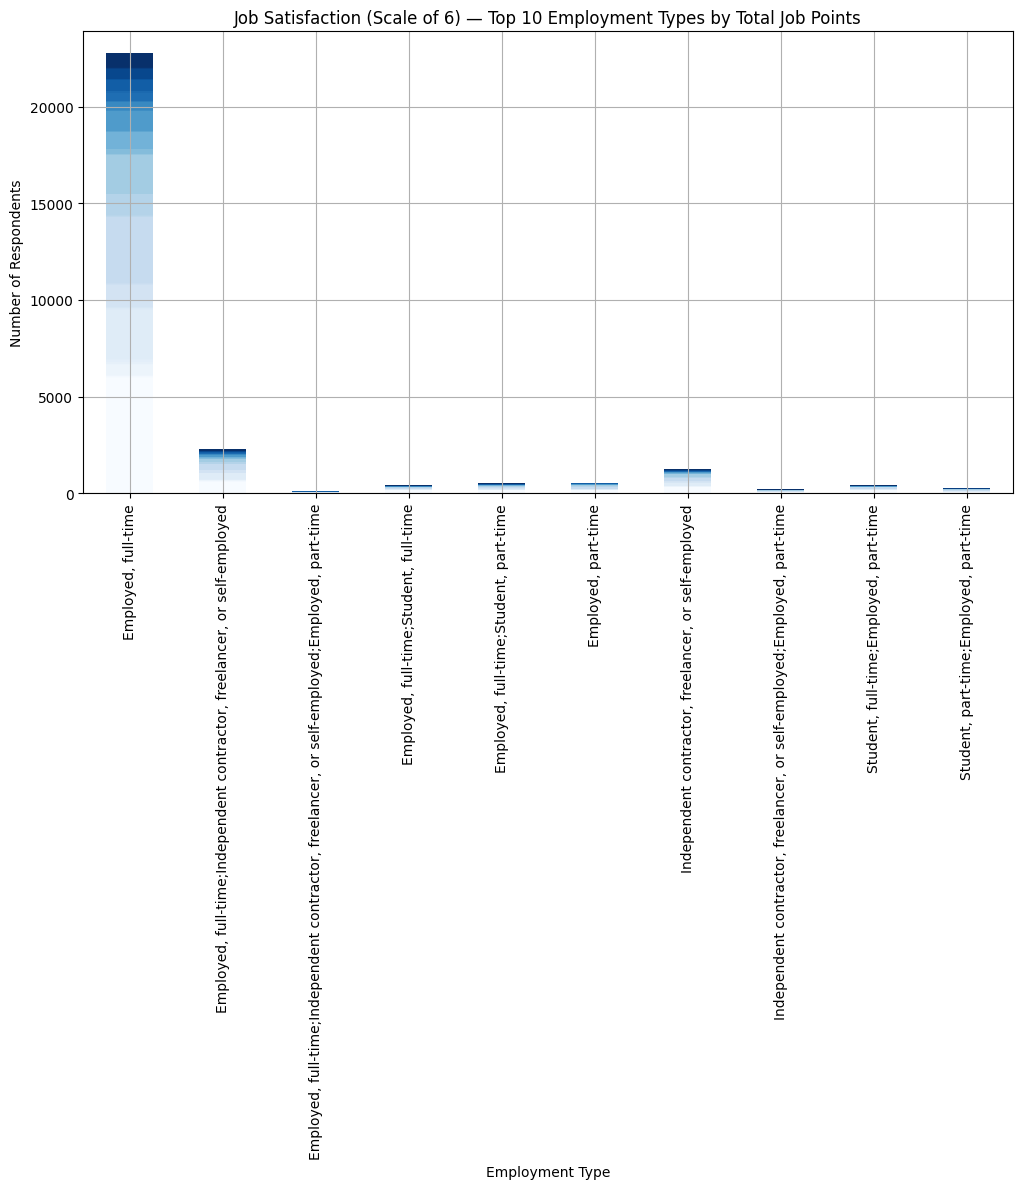

/tmp/ipykernel_5395/161515476.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


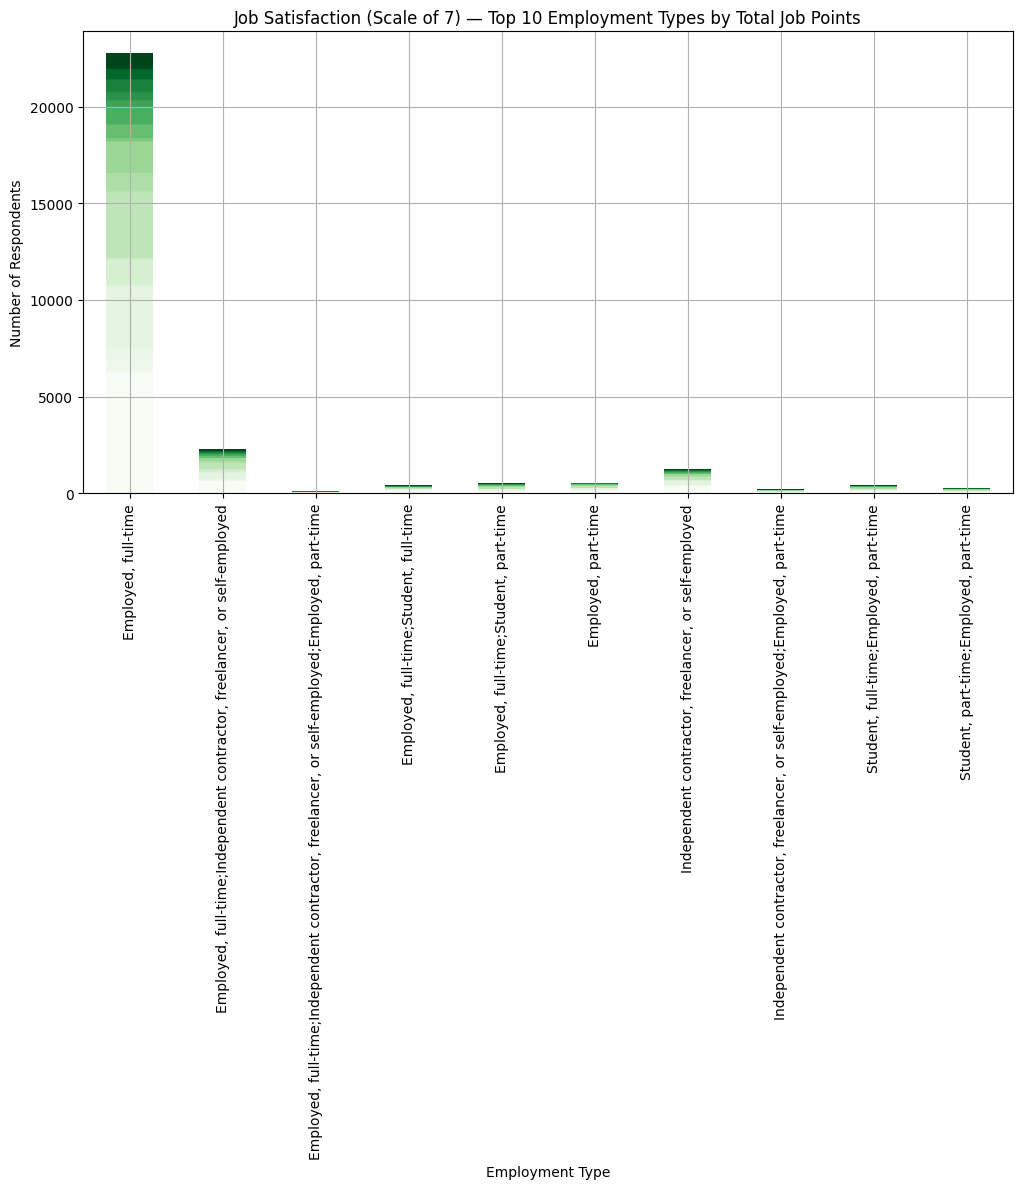

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("survey-data.csv")
df = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Convert job satisfaction points to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')

# Compute total job points per employment type
employment_points = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].sum()
employment_points['TotalPoints'] = employment_points['JobSatPoints_6'] + employment_points['JobSatPoints_7']

# Get top 10 employment types by total points
top_employment = employment_points.sort_values('TotalPoints', ascending=False).head(10).index
df_top = df[df['Employment'].isin(top_employment)]

# JobSatPoints_6 by Employment (top 10)
sat6 = df_top.groupby(['Employment', 'JobSatPoints_6']).size().unstack(fill_value=0)
sat6.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12,6), legend=False)
plt.title('Job Satisfaction (Scale of 6) — Top 10 Employment Types by Total Job Points')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# JobSatPoints_7 by Employment (top 10)
sat7 = df_top.groupby(['Employment', 'JobSatPoints_7']).size().unstack(fill_value=0)
sat7.plot(kind='bar', stacked=True, colormap='Greens', figsize=(12,6), legend=False)
plt.title('Job Satisfaction (Scale of 7) — Top 10 Employment Types by Total Job Points')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_6020/2824784028.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30_35['ConvertedCompYearly'] = pd.to_numeric(df_30_35['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_6020/2824784028.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30_35['JobSatPoints_6'] = pd.to_numeric(df_30_35['JobSatPoints_6'], errors='coerce')
/tmp/ipykernel_6020/2824784028.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

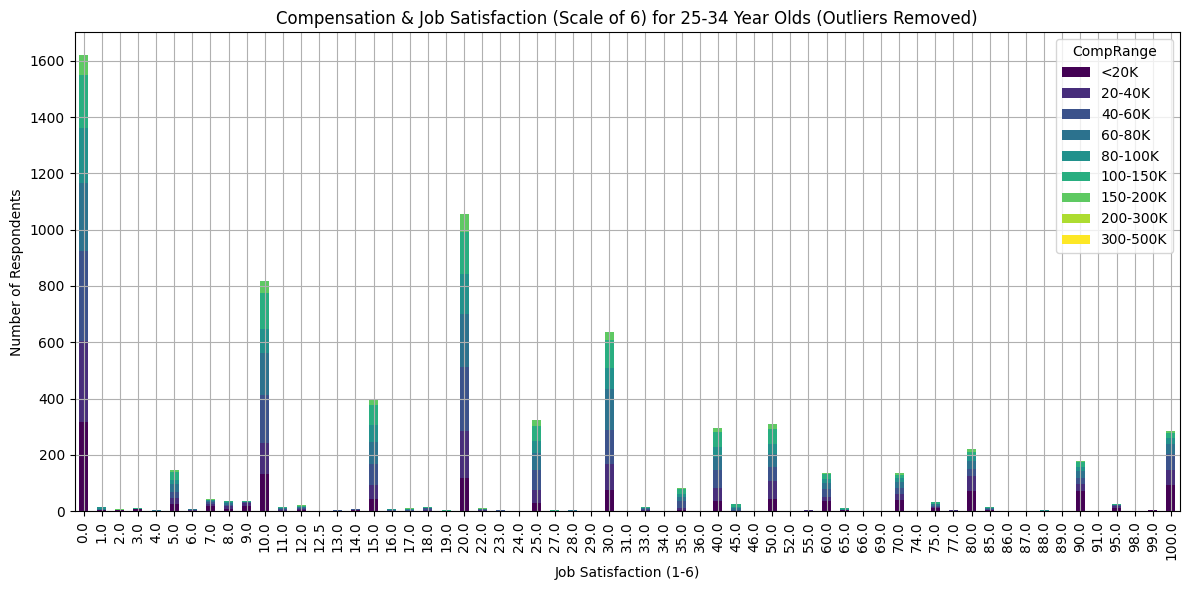

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("survey-data.csv")
df = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Filter for '25-34 years old'
df_30_35 = df[df['Age'] == '25-34 years old']

# Convert numeric columns
df_30_35['ConvertedCompYearly'] = pd.to_numeric(df_30_35['ConvertedCompYearly'], errors='coerce')
df_30_35['JobSatPoints_6'] = pd.to_numeric(df_30_35['JobSatPoints_6'], errors='coerce')

# Remove outliers using IQR method
Q1 = df_30_35['ConvertedCompYearly'].quantile(0.25)
Q3 = df_30_35['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_30_35_cleaned = df_30_35[(df_30_35['ConvertedCompYearly'] >= lower_bound) &
                            (df_30_35['ConvertedCompYearly'] <= upper_bound)]

# Bin compensation into ranges for stacking
comp_bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 300000, 500000]
comp_labels = ['<20K', '20-40K', '40-60K', '60-80K', '80-100K', '100-150K', '150-200K', '200-300K', '300-500K']
df_30_35_cleaned['CompRange'] = pd.cut(df_30_35_cleaned['ConvertedCompYearly'], bins=comp_bins, labels=comp_labels)


# Group by Job Satisfaction and Compensation Range
grouped = df_30_35_cleaned.groupby(['JobSatPoints_6', 'CompRange']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12,6), legend=True)
plt.title('Compensation & Job Satisfaction (Scale of 6) for 25-34 Year Olds (Outliers Removed)')
plt.xlabel('Job Satisfaction (1-6)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


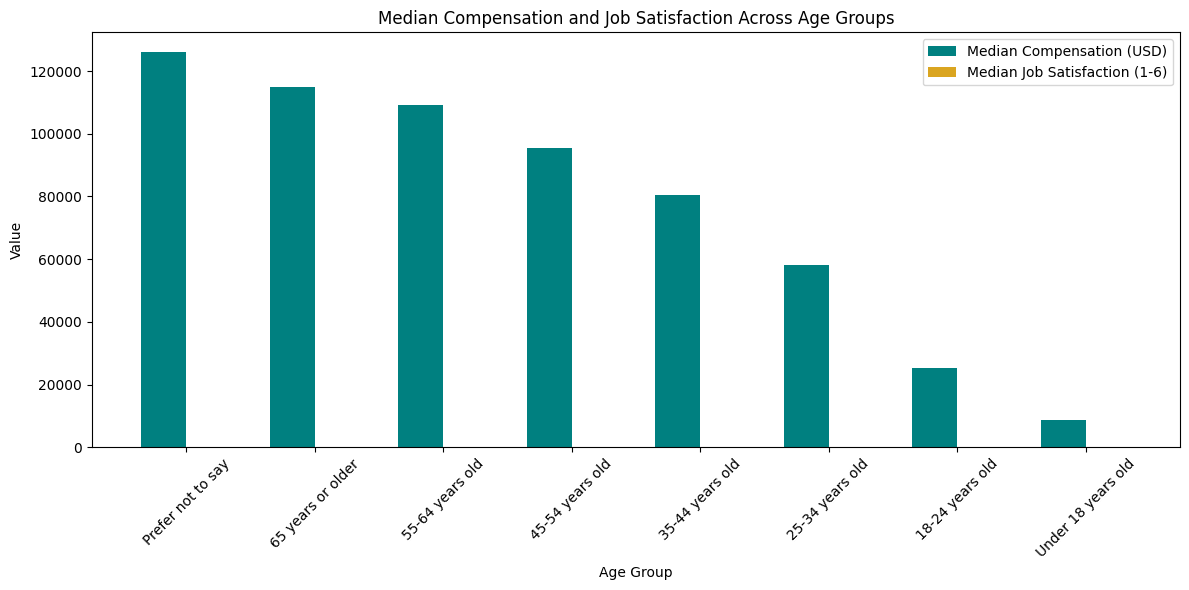

In [6]:
import numpy as np
# Load and clean data
df = pd.read_csv("survey-data.csv")
df = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Remove outliers from compensation using IQR method
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Group by Age, compute medians
grouped_medians = df_cleaned.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).sort_values(by='ConvertedCompYearly', ascending=False)

# Plotting
age_groups = grouped_medians.index
comp_medians = grouped_medians['ConvertedCompYearly']
sat_medians = grouped_medians['JobSatPoints_6']

x = np.arange(len(age_groups))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

# Bar for Compensation
bars1 = ax.bar(x - width/2, comp_medians, width, label='Median Compensation (USD)', color='teal')

# Bar for Job Satisfaction
bars2 = ax.bar(x + width/2, sat_medians, width, label='Median Job Satisfaction (1-6)', color='goldenrod')

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Value')
ax.set_title('Median Compensation and Job Satisfaction Across Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


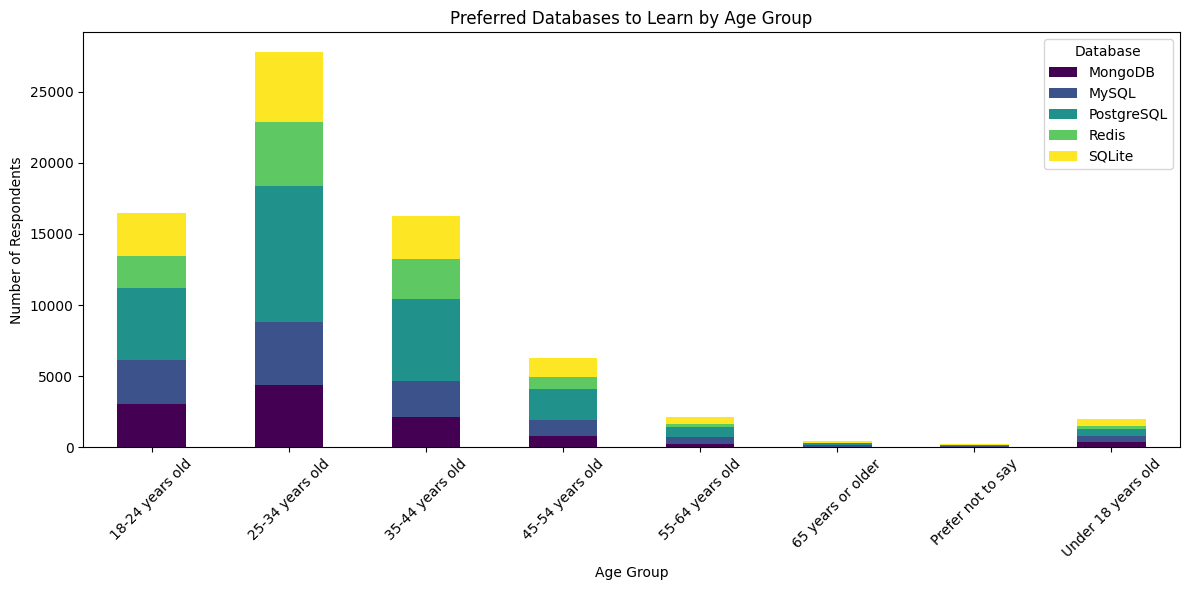

In [11]:
# Load data
df = pd.read_csv("survey-data.csv")
# df.columns.tolist()
# Keep relevant columns and drop missing values
df = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Split multiple databases into separate rows
df_expanded = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Count the total popularity of each database
top_databases = df_expanded['Database'].value_counts().nlargest(5).index.tolist()

# Keep only top 5 databases
df_top = df_expanded[df_expanded['Database'].isin(top_databases)]

# Group by Age and Database, count respondents
grouped = df_top.groupby(['Age', 'Database']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
plt.title('Preferred Databases to Learn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Database')

plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


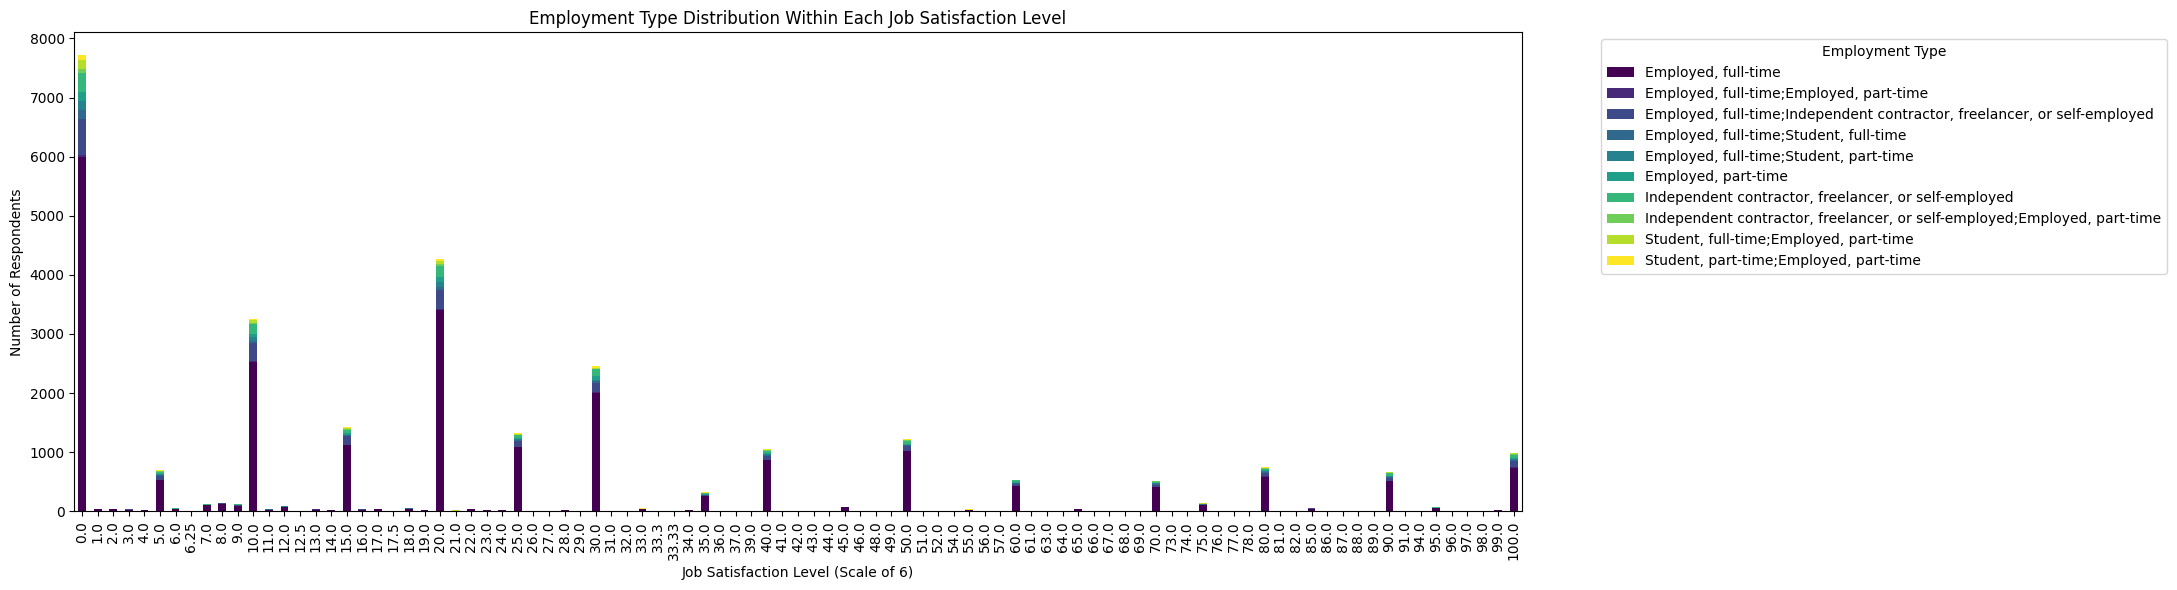

In [17]:
# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['Employment', 'JobSatPoints_6']].dropna()

# Convert satisfaction to numeric (if needed)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Keep only top 10 employment types by frequency
top_employment = df['Employment'].value_counts().nlargest(10).index.tolist()
df_top = df[df['Employment'].isin(top_employment)]

# Group by JobSatPoints_6 and Employment, then count respondents
grouped = df_top.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(22, 6), colormap='viridis')

# Add labels and title
plt.title('Employment Type Distribution Within Each Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level (Scale of 6)')
plt.ylabel('Number of Respondents')
# plt.xticks(rotation=0)
plt.xticks(rotation=90)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


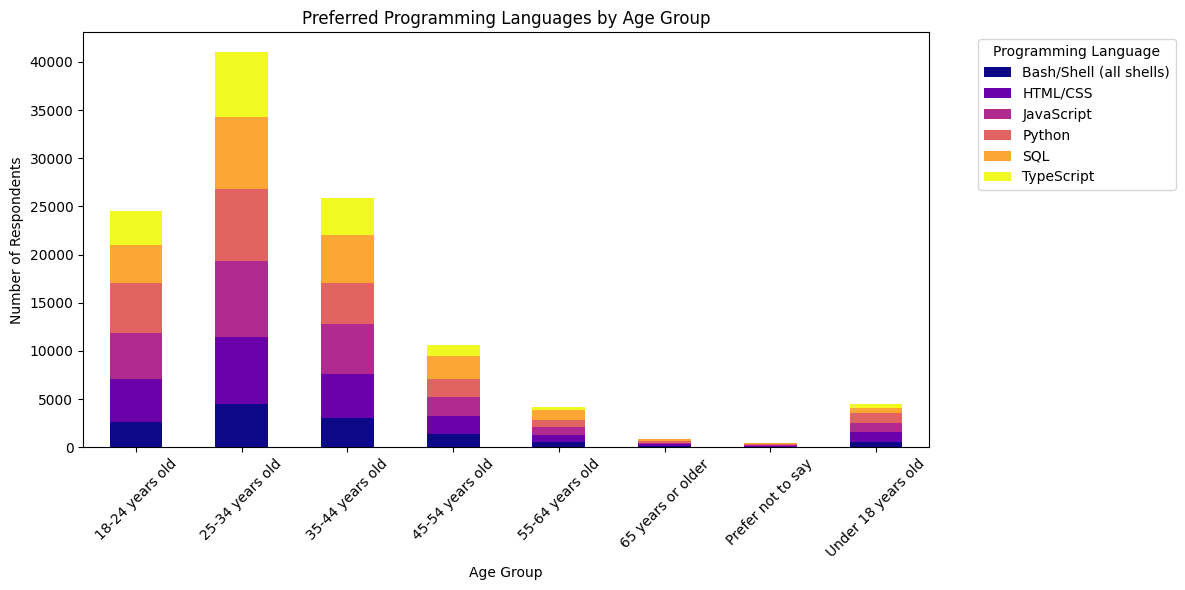

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['Age', 'LanguageAdmired']].dropna()

# Split multiple languages into separate rows
df_expanded = df.assign(Language=df['LanguageAdmired'].str.split(';')).explode('Language')

# Get top 6 most admired languages overall
top_languages = df_expanded['Language'].value_counts().nlargest(6).index.tolist()

# Filter for top languages only
df_top = df_expanded[df_expanded['Language'].isin(top_languages)]

# Group by Age and Language, count respondents
grouped = df_top.groupby(['Age', 'Language']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')

# Add labels and title
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


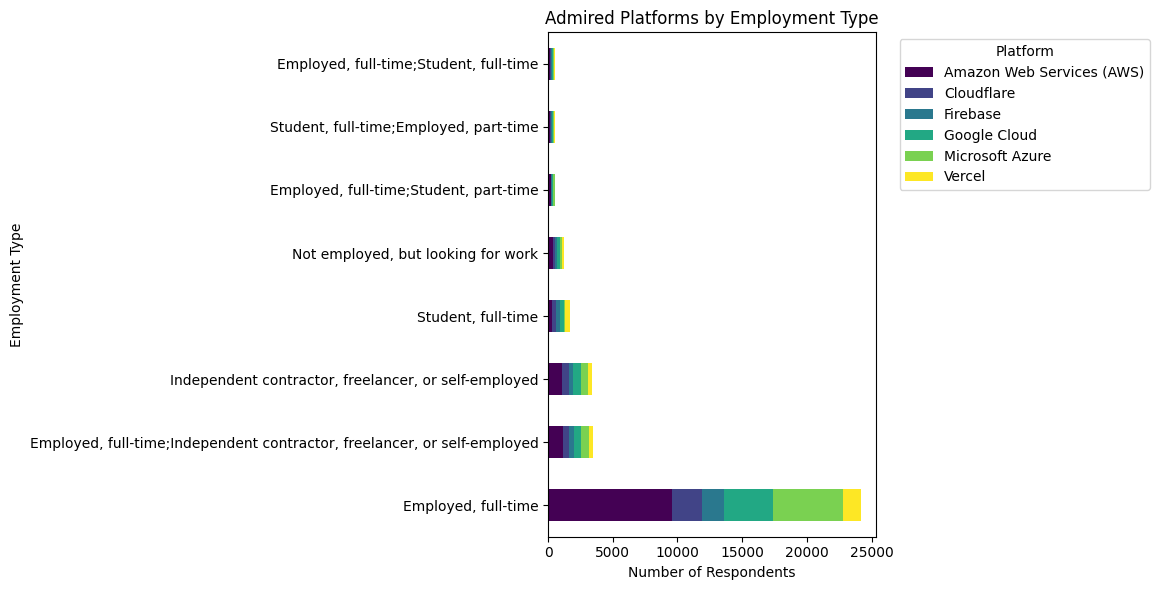

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df = df[['Employment', 'PlatformAdmired']].dropna()

# Split multiple platforms into separate rows
df_expanded = df.assign(Platform=df['PlatformAdmired'].str.split(';')).explode('Platform')

# Get top 6 most admired platforms overall
top_platforms = df_expanded['Platform'].value_counts().nlargest(6).index.tolist()

# Filter for top platforms only
df_top = df_expanded[df_expanded['Platform'].isin(top_platforms)]

# Group by Employment and Platform, count respondents
grouped = df_top.groupby(['Employment', 'Platform']).size().unstack(fill_value=0)

# Keep top 8 employment types (by total counts)
top_employment = grouped.sum(axis=1).nlargest(8).index
grouped = grouped.loc[top_employment]

# Plot horizontal stacked bar chart
grouped.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='viridis')

# Add labels and title
plt.title('Admired Platforms by Employment Type')
plt.xlabel('Number of Respondents')
plt.ylabel('Employment Type')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
